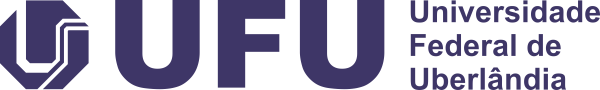

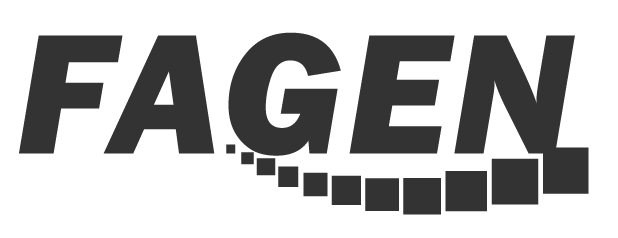

# <center> <b>Análise de Dados IV</b> </center>
## <center> <b>Introdução à Análise de Dados</b> </center>
## <center> Prof. Dr. José Eduardo Ferreira Lopes </center>

### Objetivo do Módulo

Possibilitar o contato com os conceitos da estatística descritiva, inferencial e correlacional, prover o conhecimento necessário para interpretar, selecionar médias e técnicas estatísticas apropriadas e aplicá-las a conjuntos de dados, gerando informações relevantes para a tomada de decisão


### Introdução

#### Processo de Análise Baseado em Dados

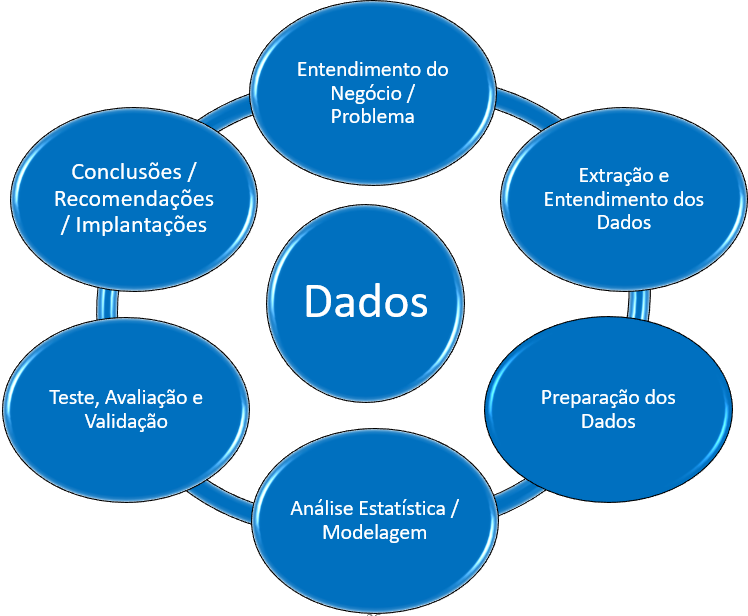

#### Modelo de Geração de Receita

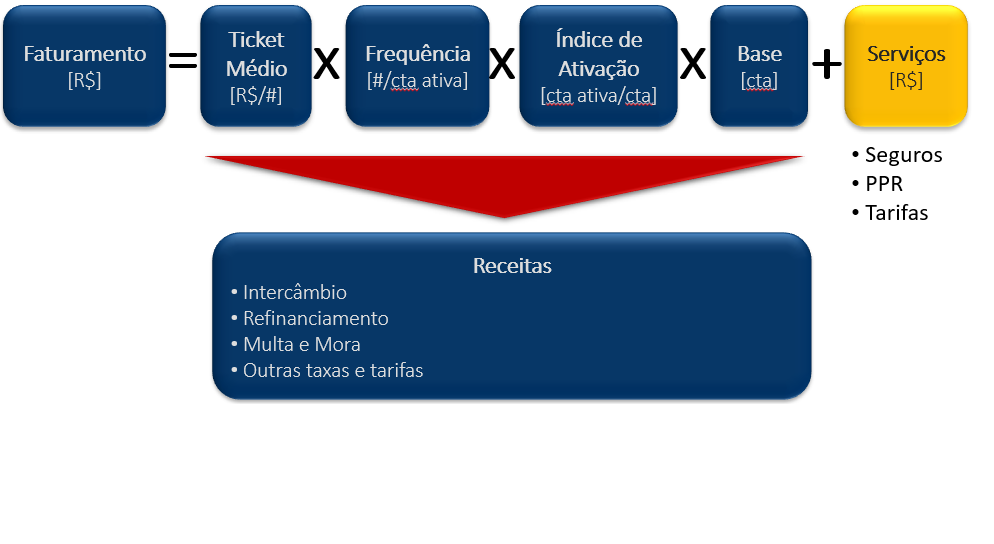

#### Variáveis

> - Uma Variável é a Propriedade a ser Estudada
> - Variável é uma característica da população (ou amostra) em estudo, possível de ser medida, contada ou categorizada. 
> - O tipo de variável coletada é crucial no cálculo de estatísticas descritivas e na representação gráfica de resultados, bem como na escolha de métodos estatísticos a serem utilizados para analisar os dados.



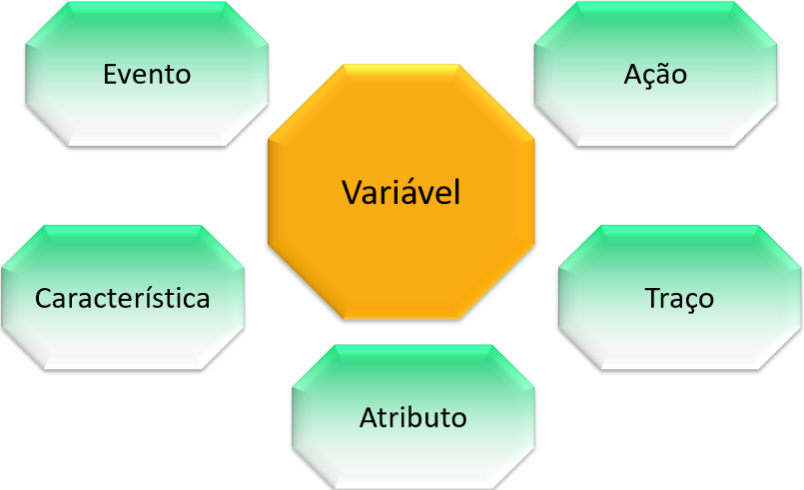

#### Tipos de Variáveis

> - **Variáveis Não Métricas:** Também conhecidas como qualitativas ou ainda categóricas) representam características de um indivíduo, objeto ou elemento que não podem ser medidas ou quantificadas; as respostas são dadas em categorias. 
> - **Variáveis Métricas:** ou quantitativas representam características de um indivíduo, objeto ou elemento resultantes de uma contagem (conjunto finito de valores) ou de uma mensuração (conjunto infinito de valores).


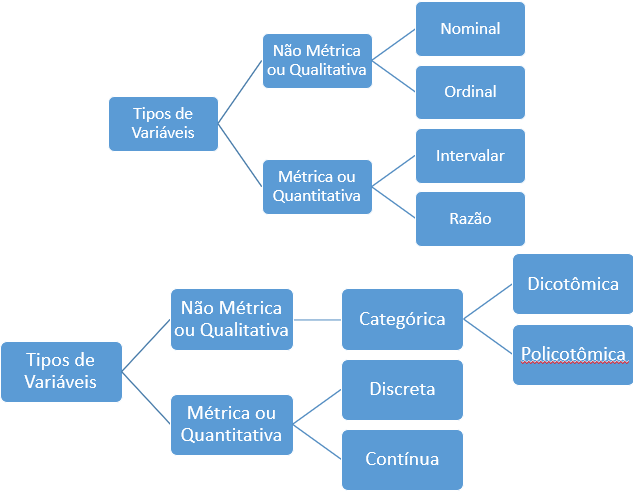

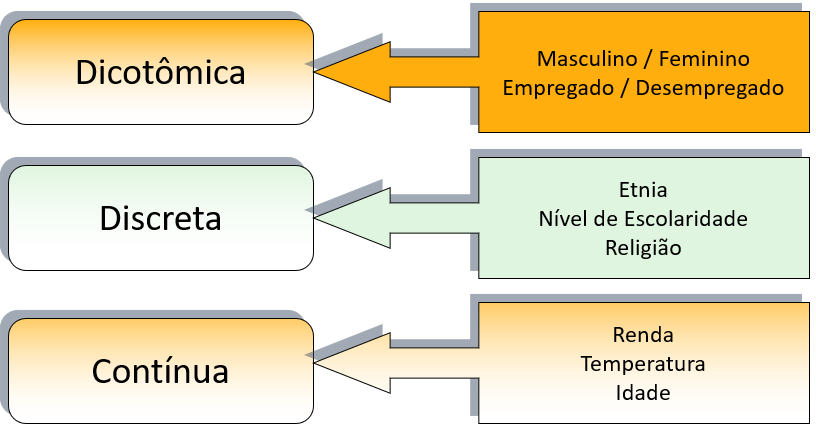

#### Variáveis - Escalas Primárias – Mapa Conceitual


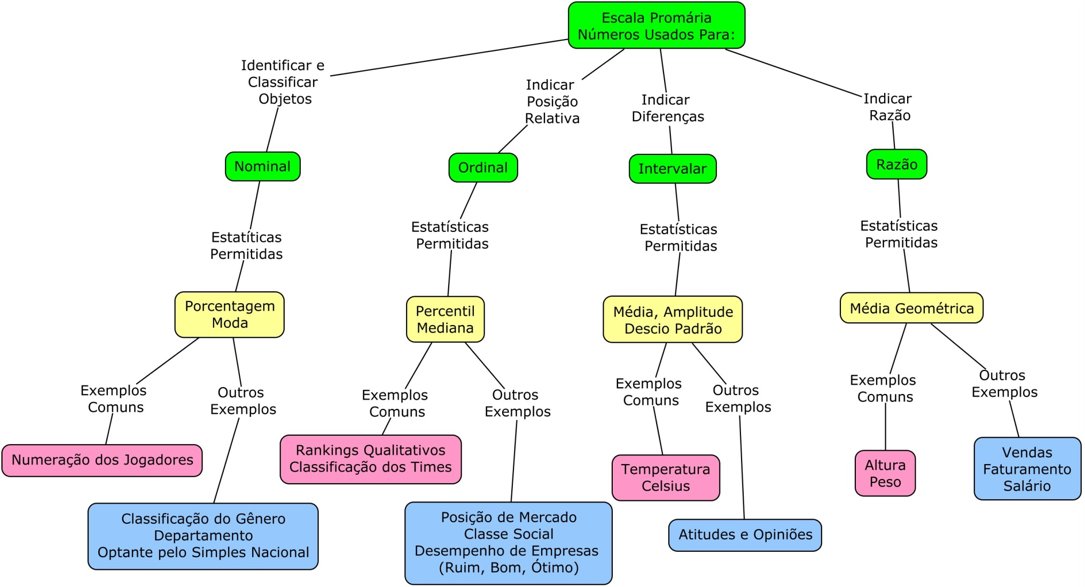

### Escalas de Mensuração X Operações <br>

| Tipo do Atributo | Descrição | Exemplos | Operações |
| :- | :- | :- | :- |
|Nominal  | Os valores de um atributo nominal são apenas nomes diferentes, isto é, atributos nominais provêm apenas informações para distinguir um objeto de outro. (=, <>) | CEP, ID de Empregados, cor dos olhos, sexo: {masculino, feminino} | moda, entropia, correlação  de contingência, teste Qui Quadrado |
|Ordinal | Os valores de um atributo ordinal provêm informação sobre ordem dos objetos. (<, >) | Rigidez dos minerais, {bom, muito bom, ótimo}, grau de escolaridade, número de ruas | mediana, percentil, correlação espessa, teste de sinal |
|Intervalo | Para atributos intervalares, a diferença entre valores são significantes, i.e., existe uma unidade de medida. (+, - ) | Datas do calendário, temperatura em  Celsius ou Fahrenheit | media, desvio padrão, correlação de Pearson, teste t e F |
|Razão | Para variáveis razão, ambas, diferenças e razão são significante. (mult e div) | Quantidades monetárias, contas, idade, massa, comprimento, corrente elétrica | Média geométrica, harmônica, percentual de variação |




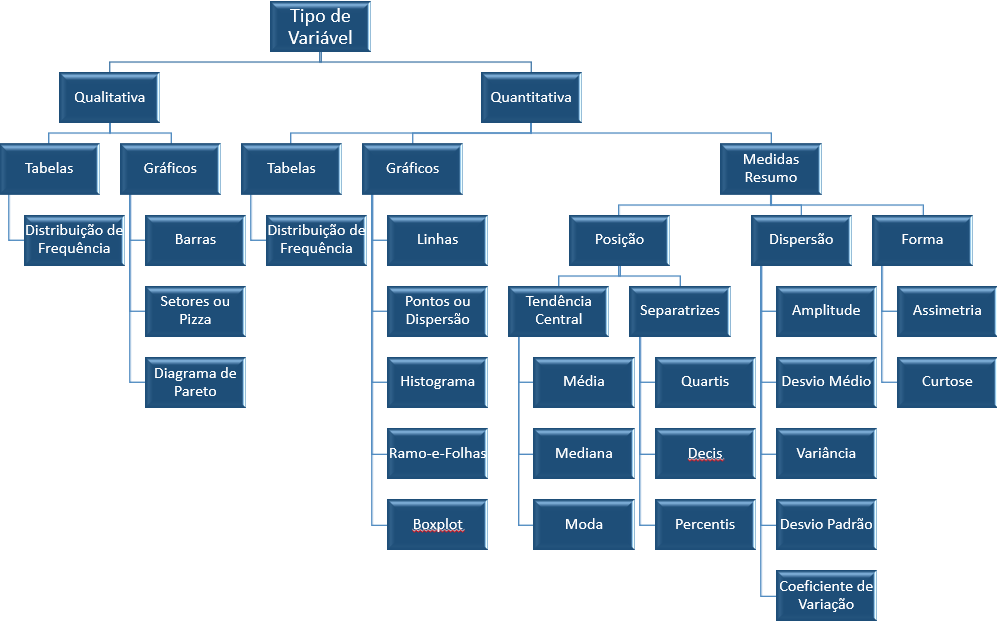

# Bibliotecas Utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
import numpy as np

from statsmodels.graphics.gofplots import qqplot

from scipy import stats as st

import researchpy as rs

from sklearn.preprocessing import StandardScaler

import locale

#locale.setlocale(locale.LC_ALL, '')
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


### Dados

Os dados utilizados são referentes à operação de uma administradora de cartões de crédito, na modalidade Private Label. Nesta modalidade de negócios, o estabelecimento comercial captura o cliente. O cliente só pode realizar compras com o cartão neste estabelecimento comercial.

Os dados são baseados em fatos reais mas, em diversas situações, foram imputados alguns ruídos, para diferenciá-los dos verdadeiros valores. Contudo, estes ruídos não alteraram o sentido e o contexto.


#### Clientes
Nesta tabela estão informações sociodemográficas e algumas informações comportamentais dos clientes<br><br>
Cod_Cliente ==> Código do Cliente<br>
Cod_Estabelecimento ==> Código do Estabelecimento Comercial<br>
Cidade ==> Nome da Cidade em que o Cliente Reside<br>
DataCadastramento ==> Data de Cadastro do Cliente<br>
CEP ==> Código de Endereçamento Postal<br>
UF ==> Unidade da Federação<br>
Sexo ==> Gênero do Cliente<br>
EstadoCivil ==> Estado Civil do Cliente<br>
DataNascimento ==> Data de Nascimento do Cliente<br>
NaturezaOcupacao ==> Natureza da Ocupação do Cliente<br>
GrauInstrucao ==> Grau de Instrução do Cliente<br>
NumeroDependentes ==> Número de Dependentes do Cliente<br>
LimiteTotal ==> Limite Total no Cartão do Cliente<br>
RendaComprovada ==> Renda Comprovada do Cliente<br>
QtdCompras2008 ==> Quantidade de Compras Realizadas pelo Cliente no ano de 2008<br>
ValorCompras2008 ==> Valor das Compras Realizadas pelo Cliente no ano de 2008<br>
Qtd_Meses_Compra2009 ==> Quantidade de Meses que o Cliente Realizou Compras com o Cartão no Ano de 2009<br>
QtdeCompra2009 ==> Quantidade de Compras Realizadas pelo Cliente no ano de 2009<br>
ValorCompra2009 ==> Valor das Compras Realizadas pelo Cliente no ano de 2009<br>
QtdeCompra2010_01 ==> Quantidade de Compras Realizadas pelo Cliente no Mês de Janeiro de 2010<br>
ValorCompra2010_01 ==> Valor das Compras Realizadas pelo Cliente no Mês de Janeiro de 2010<br>
Faixa_Estabelecimento ==> Porte do Estabelecimento Comercial a que o cliente está vinculado
Idade ==> Idade do Cliente em 31/03/2010<br>
Safra ==> Ano/Mês de Emissão do Cartão para o Cliente<br>
Ocup_Lim_2010_01 ==> Em Relação ao Lmite do Cartão, qual Foi o Percentual Utilizado no Período<br>
LimXRenda ==> Qual é a Relação entre a Renda Informada pelo Cliente e o Limite do Cartão<br>
QtdeCompra2010_02 ==> Quantidade de Compras Realizadas pelo Cliente no Mês de Fevereiro de 2010<br>
ValorCompra2010_02 ==> Valor das Compras Realizadas pelo Cliente no Mês de Fevereiro de 2010<br>
Dias_Entre_Compras ==> Intervalo Médio de Dias entre as Compras Realizadas pelo Cliente<br>


In [3]:
df = pd.read_excel("../../DADOS/Clientes.xlsx", sheet_name = "Clientes", dtype={'CEP': str}, 
                   parse_dates=["DataCadastramento", "DataNascimento"])

In [4]:
df.head(3).round(2)

,Cod_Cliente,Cod_Estabelecimento,DataCadastramento,CEP,UF,Sexo,EstadoCivil,DataNascimento,NaturezaOcupacao,GrauInstrucao,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento
0,276233,1093,2004-05-01,54800000,PE,F,Viúvo,1954-06-26,Aposentado,Até 1 Grau Completo,0.0,2000.0,1786.0,1.12,10,2164.18,12.0,15.0,3462.69,1.0,288.82,4.0
1,276470,591,2004-05-01,56318260,PE,M,Solteiro,1984-03-21,Empregados,Até 1 Grau Completo,3.0,570.0,240.0,2.38,10,2669.77,11.0,16.0,2868.60,1.0,327.13,NaN
2,276604,906,2004-09-01,59069350,RN,F,Solteiro,1932-08-25,Aposentado,Até 1 Grau Completo,0.0,470.0,240.0,1.96,78,1860.31,12.0,133.0,2818.25,15.0,300.00,2.0


In [5]:
list(df.columns)

['Cod_Cliente',
 'Cod_Estabelecimento',
 'DataCadastramento',
 'CEP',
 'UF',
 'Sexo',
 'EstadoCivil',
 'DataNascimento',
 'NaturezaOcupacao',
 'GrauInstrucao',
 'NumeroDependentes',
 'LimiteTotal',
 'RendaComprovada',
 'LimiteXReda',
 'QtdCompras2008',
 'ValorCompras2008',
 'Qtd_Meses_Compra2009',
 'QtdeCompra2009',
 'ValorCompra2009',
 'QtdeCompra2010_01',
 'ValorCompra2010_01',
 'Porte_Estabelecimento']

In [6]:
df.isna().sum()

Cod_Cliente                 0
Cod_Estabelecimento         0
DataCadastramento           0
CEP                         0
UF                          0
Sexo                       16
EstadoCivil               210
DataNascimento              1
NaturezaOcupacao         2655
GrauInstrucao               6
NumeroDependentes        4871
LimiteTotal                 0
RendaComprovada             0
LimiteXReda                 0
QtdCompras2008              0
ValorCompras2008            0
Qtd_Meses_Compra2009     1281
QtdeCompra2009           1281
ValorCompra2009          1281
QtdeCompra2010_01        5137
ValorCompra2010_01       5137
Porte_Estabelecimento     193
dtype: int64

In [7]:
df.shape

(21917, 22)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21917 entries, 0 to 21916
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Cod_Cliente            21917 non-null  int64         
 1   Cod_Estabelecimento    21917 non-null  int64         
 2   DataCadastramento      21917 non-null  datetime64[ns]
 3   CEP                    21917 non-null  object        
 4   UF                     21917 non-null  object        
 5   Sexo                   21901 non-null  object        
 6   EstadoCivil            21707 non-null  object        
 7   DataNascimento         21916 non-null  datetime64[ns]
 8   NaturezaOcupacao       19262 non-null  object        
 9   GrauInstrucao          21911 non-null  object        
 10  NumeroDependentes      17046 non-null  float64       
 11  LimiteTotal            21917 non-null  float64       
 12  RendaComprovada        21917 non-null  float64       
 13  L

In [9]:
df.describe(include='all')

C:\Users\lopes\AppData\Local\Temp/ipykernel_9528/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Cod_Cliente,Cod_Estabelecimento,DataCadastramento,CEP,UF,Sexo,EstadoCivil,DataNascimento,NaturezaOcupacao,GrauInstrucao,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento
count,2.191700e+04,21917.000000,21917,21917,21917,21901,21707,21916,19262,21911,17046.000000,21917.000000,21917.000000,21917.000000,21917.000000,21917.000000,20636.000000,20636.000000,20636.000000,16780.000000,16780.000000,21724.000000
unique,NaN,NaN,2038,12231,27,2,7,13345,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2010-01-30 00:00:00,7500000,SP,F,Casado,1953-08-10 00:00:00,Empregados,Até 2 Grau Completo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,50,120,3988,12943,10207,9,8185,8152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2004-01-03 00:00:00,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-01 00:00:00,NaN,NaN,NaN,NaN,2028-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.814789e+06,11850.364831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.768098,344.229367,860.543194,0.574765,13.073915,822.706267,7.892615,19.426342,1221.346792,2.556079,158.922332,2.648683
std,1.099201e+06,7091.414716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.430471,367.718296,4598.377838,0.887555,15.314168,834.174271,3.634328,23.114438,1267.607080,2.501996,140.310118,1.145711
min,2.762330e+05,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,3.600000,0.000194,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.010000,1.000000
25%,2.046439e+06,6171.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,125.000000,415.000000,0.204422,5.000000,266.800000,5.000000,7.000000,380.612500,1.000000,66.727500,2.000000


### Localização de um registro específico

In [10]:
df.loc[df['Cod_Cliente'] == 4065174].round(2)

,Cod_Cliente,Cod_Estabelecimento,DataCadastramento,CEP,UF,Sexo,EstadoCivil,DataNascimento,NaturezaOcupacao,GrauInstrucao,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento
21362,4065174,26708,2010-01-15,79750000,MS,M,Casado,1936-02-17,NaN,Outros,NaN,200.0,1000.0,0.2,1,56.85,NaN,NaN,NaN,1.0,56.85,2.0


In [13]:
df['Sexo'].loc[df['Cod_Cliente'] == 4065174]

21362    M
Name: Sexo, dtype: object

### Criação de Subconjunto de Dados

In [14]:
dfMG = df.loc[df['UF'] == 'MG']

In [15]:
dfMG = dfMG.loc[df['NumeroDependentes'] > 0]

In [16]:
dfMG.head(3)

,Cod_Cliente,Cod_Estabelecimento,DataCadastramento,CEP,UF,Sexo,EstadoCivil,DataNascimento,NaturezaOcupacao,GrauInstrucao,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento
36,289021,1025,2004-01-29,37130000,MG,M,Solteiro,1978-08-25,Empregados,Até 2 Grau Completo,1.0,1590.0,600.0,2.650000,7,1625.24,12.0,12.0,2991.50,1.0,205.06,3.0
50,293491,1679,2004-05-02,35450000,MG,F,Viúvo,1959-05-04,Aposentado,Até 1 Grau Completo,3.0,2000.0,1228.0,1.628664,18,3678.47,12.0,28.0,6417.69,2.0,714.88,4.0
117,317952,907,2004-03-23,35164100,MG,F,Casado,1968-11-08,Empregados,Até 1 Grau Completo,3.0,600.0,240.0,2.500000,13,1578.29,12.0,22.0,2716.00,1.0,243.78,3.0


### Dados Não Métricos

#### Exploração / Descrição dos dados com o uso de tabelas e gráficos


<p> Funções Utilizadas: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot">pandas.DataFrame.plot()</a> <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/plotting.htmlt">plotting()</a> <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting">plotting()</a> <br> 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">pandas.DataFrame.groupby()</a> <br>
</p>

In [17]:
df.groupby('Sexo').count()['Cod_Cliente'].apply("{0:,.0f}".format)

Sexo
F    12,943
M     8,958
Name: Cod_Cliente, dtype: object

## Análise

Dos 21.917 clientes, 12.943 são do sexo feminino

<AxesSubplot:title={'center':'Cliente por Gênero'}, ylabel='Cod_Cliente'>

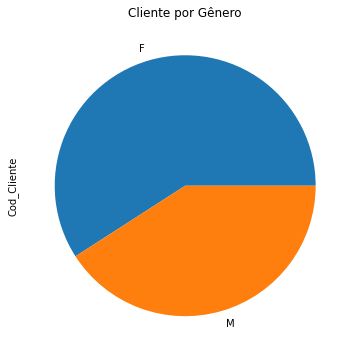

In [18]:
df.groupby(by="Sexo").count()["Cod_Cliente"].plot(kind='pie', title = 'Cliente por Gênero', y='Clientes', figsize=(10, 6))

#### Analise

<AxesSubplot:title={'center':'Clientes por Gênero'}, ylabel='Cod_Cliente'>

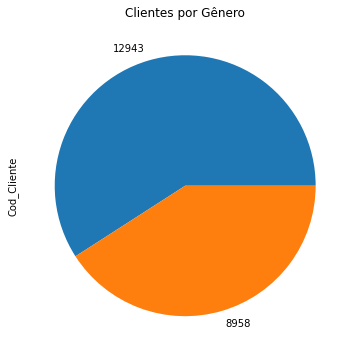

In [19]:
df.groupby(by="Sexo").count()["Cod_Cliente"].plot(kind='pie', labels=df.groupby(by="Sexo").count()["Cod_Cliente"], title = 'Clientes por Gênero', y='Clientes', figsize=(10, 6))

<AxesSubplot:title={'center':'Clientes por Gênero'}, ylabel='Cod_Cliente'>

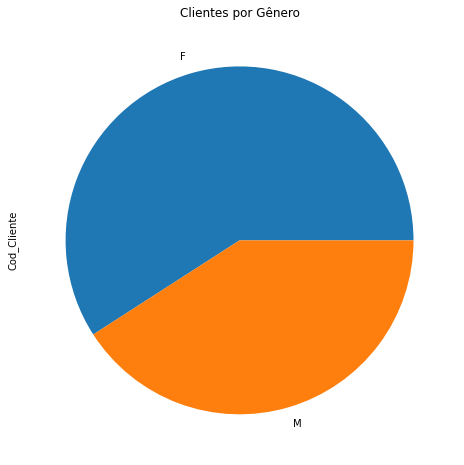

In [20]:
df.groupby(by="Sexo").count()["Cod_Cliente"].plot.pie(title = 'Clientes por Gênero', y='Clientes', figsize=(10, 8))

<AxesSubplot:title={'center':'Clientes por Gênero'}, xlabel='Sexo'>

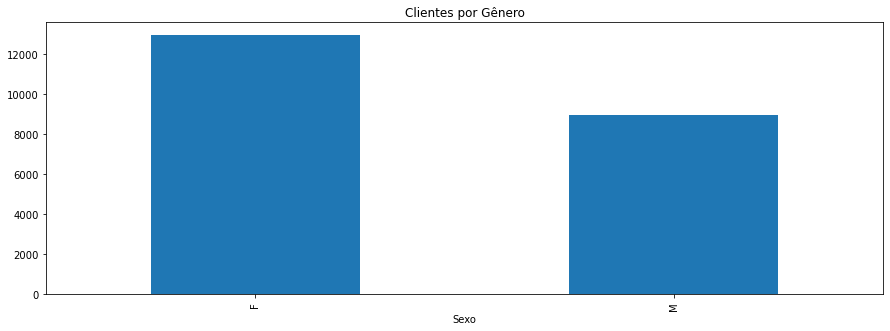

In [21]:
df.groupby(by="Sexo").count()["Cod_Cliente"].plot(kind='bar', title = 'Clientes por Gênero', y='Clientes', figsize=(15, 5))

In [22]:
uf = df.groupby(by="UF").count()["Cod_Cliente"].rename('Qtd_Clientes')
uf = uf.reset_index()

In [23]:
uf

,UF,Qtd_Clientes
0,AC,194
1,AL,611
2,AM,202
3,AP,195
4,BA,1784
5,CE,1535
6,DF,259
7,ES,230
8,GO,606
9,MA,286


#### Gráfico de Barras


<p> Função Utilizada: <br>
<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html">matplotlib.pyplot.plot.html()</a> <br>
</p>

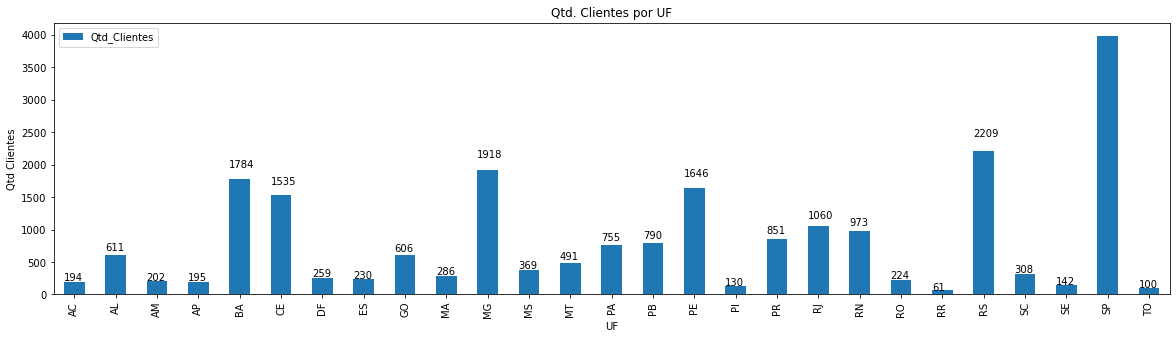

In [24]:
plt.rcParams["figure.figsize"] = (20,5)
ax = uf.plot(kind='bar') 
ax.set_xticklabels(uf["UF"], minor=False)
plt.title('Qtd. Clientes por UF')
plt.ylabel('Qtd Clientes')
plt.xlabel('UF') 
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.10))

#### Contagem de Valores


<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html">pandas.crosstab()</a> <br>
</p>

In [25]:
df['UF'].value_counts(dropna=False)

SP    3988
RS    2209
MG    1918
BA    1784
PE    1646
CE    1535
RJ    1060
RN     973
PR     851
PB     790
PA     755
AL     611
GO     606
MT     491
MS     369
SC     308
MA     286
DF     259
ES     230
RO     224
AM     202
AP     195
AC     194
SE     142
PI     130
TO     100
RR      61
Name: UF, dtype: int64

In [26]:
df['UF'].value_counts(dropna=False, ascending=True)

RR      61
TO     100
PI     130
SE     142
AC     194
AP     195
AM     202
RO     224
ES     230
DF     259
MA     286
SC     308
MS     369
MT     491
GO     606
AL     611
PA     755
PB     790
PR     851
RN     973
RJ    1060
CE    1535
PE    1646
BA    1784
MG    1918
RS    2209
SP    3988
Name: UF, dtype: int64

In [27]:
def value_counts(df, column, top_n=30, dropna=False):

    absolute = df[column].value_counts(dropna=dropna)
    normalized = df[column].value_counts(dropna=dropna, normalize=True)
    
    if top_n is not None:
        absolute = absolute.head(top_n)
        normalized = normalized.head(top_n)

    return pd.DataFrame({
        'Absoluto': absolute,
        'Relativo': (normalized * 100).round(2)
    })

In [28]:
value_counts(df, 'UF', 15)

,Absoluto,Relativo
SP,3988,18.20
RS,2209,10.08
MG,1918,8.75
BA,1784,8.14
PE,1646,7.51
CE,1535,7.00
RJ,1060,4.84
RN,973,4.44
PR,851,3.88
PB,790,3.60


#### Tabela de Rerferência Cruzada, Tabela de Contingência ou Tabela de Dupla Entrada

Permite fazer o cruzamento de variáveis categóricas

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html">pandas.crosstab()</a> <br>
</p>

In [29]:
pd.crosstab(df['UF'], df['Sexo'])

Sexo,F,M
UF,,
AC,131,63
AL,361,247
AM,120,82
AP,122,72
BA,1020,762
CE,968,564
DF,162,97
ES,139,91
GO,334,272


In [30]:
# Análise das Variáveis Categóricas - X1 - Valores Absolutos
pd.crosstab(df['UF'], df['Sexo'], rownames=['UF'], colnames=['Gênero'], margins=True, margins_name='Total')

Gênero,F,M,Total
UF,,,
AC,131,63,194
AL,361,247,608
AM,120,82,202
AP,122,72,194
BA,1020,762,1782
CE,968,564,1532
DF,162,97,259
ES,139,91,230
GO,334,272,606


In [31]:
# Análise das Variáveis Categóricas - X1 - Valores Absolutos
pd.crosstab(df['UF'], df['Sexo'], rownames=['UF'], colnames=['Gênero'], \
            margins=True, margins_name='Total',  normalize='all').round(2)

Gênero,F,M,Total
UF,,,
AC,0.01,0.00,0.01
AL,0.02,0.01,0.03
AM,0.01,0.00,0.01
AP,0.01,0.00,0.01
BA,0.05,0.03,0.08
CE,0.04,0.03,0.07
DF,0.01,0.00,0.01
ES,0.01,0.00,0.01
GO,0.02,0.01,0.03


### Dados Métricos

### Três Características dos Dados Numéricos <br>

| Característica  | Interpretação |
| :- | :- | 
|Centro   | Onde os dados estão concentrados? Qual parece ser o valor típico ou meio dos dados? Existe uma tendência central? |
|Variabilidade | Quanta dispersão existe nos dados? Como os dados estão espalhados? Existem valores não usuais? |
|Forma | Os dados estão distribuídos simetricamente? Acentuadamente pontiagudo? Achatado? |



### Medidas de Tendência Central

**Média Aritmética**: Medida de centro encontrada pela adição dos valores  e divisão do total pelo número de valores.

#### População:

<FONT SIZE="4">
$\begin{aligned}
\mu = \frac{\sum_{i=1}^{n} x_i} {N}
 \end{aligned}$
</FONT>


**Mediana**: É o valor do meio quando os dados estão em ordem crescente ou decrescente de magnitude.




### Definição da Variáveis a serem Utilizadas na Análise

In [32]:
variaveis = ['LimiteTotal', 'RendaComprovada', 'Idade', 'ValorCompra2010_01', 'Ocup_Lim_2010_01','LimXRenda']

In [33]:
df['Idade'] = ((pd.to_datetime('20100331', format='%Y%m%d', errors='coerce') - df['DataNascimento']).dt.days / 365.25).round(2)

In [34]:
df['Ocup_Lim_2010_01'] = ((df['ValorCompra2010_01'] / df['LimiteTotal']) * 100).round(2)

In [35]:
df['LimXRenda'] = ((df['LimiteTotal'] / df['RendaComprovada']) * 100).round(2)

In [36]:
df.head()

,Cod_Cliente,Cod_Estabelecimento,DataCadastramento,CEP,UF,Sexo,EstadoCivil,DataNascimento,NaturezaOcupacao,GrauInstrucao,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento,Idade,Ocup_Lim_2010_01,LimXRenda
0,276233,1093,2004-05-01,54800000,PE,F,Viúvo,1954-06-26,Aposentado,Até 1 Grau Completo,0.0,2000.0,1786.0,1.119821,10,2164.18,12.0,15.0,3462.69,1.0,288.82,4.0,55.76,14.44,111.98
1,276470,591,2004-05-01,56318260,PE,M,Solteiro,1984-03-21,Empregados,Até 1 Grau Completo,3.0,570.0,240.0,2.375000,10,2669.77,11.0,16.0,2868.60,1.0,327.13,NaN,26.03,57.39,237.50
2,276604,906,2004-09-01,59069350,RN,F,Solteiro,1932-08-25,Aposentado,Até 1 Grau Completo,0.0,470.0,240.0,1.958333,78,1860.31,12.0,133.0,2818.25,15.0,300.00,2.0,77.60,63.83,195.83
3,276804,904,2004-05-01,51350540,PE,F,Solteiro,1966-10-03,Aposentado,Até 2 Grau Completo,0.0,242.0,689.0,0.351234,4,286.70,2.0,3.0,259.77,1.0,26.93,4.0,43.49,11.13,35.12
4,277105,1475,2004-05-01,06132220,SP,M,Casado,1975-11-29,Empregados,Até 2 Grau Completo,1.0,2000.0,1000.0,2.000000,8,1276.42,9.0,12.0,2016.44,1.0,255.78,4.0,34.34,12.79,200.00


<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html#pandas.DataFrame.mean">pandas.DataFrame.mean()</a> <br>
</p>

In [37]:
df[variaveis].mean().apply("{0:,.2f}".format)

LimiteTotal           344.23
RendaComprovada       860.54
Idade                  44.00
ValorCompra2010_01    158.92
Ocup_Lim_2010_01       57.85
LimXRenda              57.48
dtype: object

In [38]:
df.loc[df['LimXRenda'] > 100, variaveis].mean().apply("{0:,.2f}".format)


LimiteTotal           813.18
RendaComprovada       514.46
Idade                  48.74
ValorCompra2010_01    250.84
Ocup_Lim_2010_01       36.21
LimXRenda             174.76
dtype: object

In [39]:
media = np.mean(df['LimXRenda'])

In [40]:
print('Média foramtada para padrão Brasil: ', locale.format_string("%1.2f",media, grouping=True))

Média foramtada para padrão Brasil:  57,48


<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html#pandas.DataFrame.median">pandas.DataFrame.median()</a> <br>
</p>

In [41]:
df[variaveis].median().apply("{0:,.2f}".format)

LimiteTotal           210.00
RendaComprovada       545.60
Idade                  42.13
ValorCompra2010_01    120.00
Ocup_Lim_2010_01       55.33
LimXRenda              40.00
dtype: object

### Medidas de Variabilidade

**Variância/Desvio Padrão**: É uma medida de variação dos dados em torno da média.


#### Variância da População:

<FONT SIZE="4">
$\begin{aligned}
\sigma{_x}^{2} = \frac{\sum_{i=1}^{N} (x_i - \bar{x})^2\quad} {N}
 \end{aligned}$
</FONT>

#### Desvio Padrão da População:

<FONT SIZE="4">
$\begin{aligned}
\sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \bar{x})^2\quad} {N}}
 \end{aligned}$
</FONT>

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html#pandas.DataFrame.var">pandas.DataFrame.var()</a> <br>
</p>

In [42]:
df[variaveis].var().apply("{0:,.3f}".format)

LimiteTotal              135,216.745
RendaComprovada       21,145,078.740
Idade                        232.705
ValorCompra2010_01        19,686.929
Ocup_Lim_2010_01           1,289.221
LimXRenda                  7,877.541
dtype: object

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html#pandas.DataFrame.std">pandas.DataFrame.std()</a> <br>
</p>

In [43]:
df[variaveis].std().apply("{0:,.3f}".format)

LimiteTotal             367.718
RendaComprovada       4,598.378
Idade                    15.255
ValorCompra2010_01      140.310
Ocup_Lim_2010_01         35.906
LimXRenda                88.756
dtype: object

### Outras Medidas


<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html#pandas.DataFrame.count">pandas.DataFrame.count()</a> <br>
</p>

In [44]:
df[variaveis].count()

LimiteTotal           21917
RendaComprovada       21917
Idade                 21916
ValorCompra2010_01    16780
Ocup_Lim_2010_01      16780
LimXRenda             21917
dtype: int64

**Desvio Absoluto Médio (MAD):**


<FONT SIZE="4">
$\begin{aligned}
MAD = \frac{\sum_{i=1}^{N} |x_i - \bar{x}|} {n}
 \end{aligned}$
</FONT>

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mad.html#pandas.DataFrame.mad">pandas.DataFrame.mad()</a> <br>
</p>

In [45]:
df[variaveis].mad().apply("{:,.2f}".format)

LimiteTotal           243.78
RendaComprovada       551.60
Idade                  12.58
ValorCompra2010_01     97.84
Ocup_Lim_2010_01       29.22
LimXRenda              39.05
dtype: object

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html#pandas.DataFrame.max">pandas.DataFrame.max()</a> <br>
</p>

In [46]:
df[variaveis].max().apply("{0:,.2f}".format)

LimiteTotal             2,000.00
RendaComprovada       465,000.00
Idade                     110.24
ValorCompra2010_01      2,101.28
Ocup_Lim_2010_01          608.21
LimXRenda               4,500.00
dtype: object

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html#pandas.DataFrame.min">pandas.DataFrame.min()</a> <br>
</p>

In [47]:
df[variaveis].min().apply("{0:,.2f}".format)

LimiteTotal            60.00
RendaComprovada         3.60
Idade                 -18.23
ValorCompra2010_01      0.01
Ocup_Lim_2010_01        0.00
LimXRenda               0.02
dtype: object

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html#pandas.DataFrame.sum">pandas.DataFrame.min()</a> <br>
</p>

In [48]:
df[variaveis].sum().apply("{0:,.2f}".format)

LimiteTotal            7,544,475.03
RendaComprovada       18,860,525.18
Idade                    964,264.41
ValorCompra2010_01     2,666,716.73
Ocup_Lim_2010_01         970,679.27
LimXRenda              1,259,712.19
dtype: object

### Resumo de Algumas Medidas


<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">pandas.DataFrame.min()</a> <br>
</p>

In [49]:
df.describe().round(2)

,Cod_Cliente,Cod_Estabelecimento,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento,Idade,Ocup_Lim_2010_01,LimXRenda
count,21917.00,21917.00,17046.00,21917.00,21917.00,21917.00,21917.00,21917.00,20636.00,20636.00,20636.00,16780.00,16780.00,21724.00,21916.00,16780.00,21917.00
mean,2814788.53,11850.36,0.77,344.23,860.54,0.57,13.07,822.71,7.89,19.43,1221.35,2.56,158.92,2.65,44.00,57.85,57.48
std,1099200.57,7091.41,1.43,367.72,4598.38,0.89,15.31,834.17,3.63,23.11,1267.61,2.50,140.31,1.15,15.25,35.91,88.76
min,276233.00,6.00,0.00,60.00,3.60,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.01,1.00,-18.23,0.00,0.02
25%,2046439.00,6171.00,0.00,125.00,415.00,0.20,5.00,266.80,5.00,7.00,380.61,1.00,66.73,2.00,31.92,28.14,20.44
50%,3143225.00,10247.00,0.00,210.00,545.60,0.40,9.00,570.29,9.00,13.00,805.38,2.00,120.00,3.00,42.13,55.32,40.00
75%,3755420.00,17036.00,1.00,390.00,845.00,0.70,15.00,1107.52,11.00,23.00,1635.74,3.00,201.94,4.00,54.34,87.77,69.71
max,4086816.00,27628.00,99.00,2000.00,465000.00,45.00,293.00,12653.78,12.00,453.00,20549.78,39.00,2101.28,4.00,110.24,608.21,4500.00


In [50]:
df[variaveis].describe(percentiles=[.05,.10,.25,.5,.75,.90,.95]).round(2)

,LimiteTotal,RendaComprovada,Idade,ValorCompra2010_01,Ocup_Lim_2010_01,LimXRenda
count,21917.00,21917.00,21916.00,16780.00,16780.00,21917.00
mean,344.23,860.54,44.00,158.92,57.85,57.48
std,367.72,4598.38,15.25,140.31,35.91,88.76
min,60.00,3.60,-18.23,0.01,0.00,0.02
5%,72.00,296.00,22.29,22.68,8.65,9.00
10%,90.00,320.00,25.10,35.01,13.78,12.00
25%,125.00,415.00,31.92,66.73,28.14,20.44
50%,210.00,545.60,42.13,120.00,55.32,40.00
75%,390.00,845.00,54.34,201.94,87.77,69.71
90%,750.00,1393.00,66.17,322.00,99.93,125.26


### Análise

Observa-se que....

In [51]:
df.loc[df['LimiteTotal'] <= 100]

,Cod_Cliente,Cod_Estabelecimento,DataCadastramento,CEP,UF,Sexo,EstadoCivil,DataNascimento,NaturezaOcupacao,GrauInstrucao,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento,Idade,Ocup_Lim_2010_01,LimXRenda
66,297940,93,2004-02-19,3945060,SP,F,Casado,1969-03-11,Autonomo,Até 2 Grau Completo,0.0,100.0,200.0,0.500000,8,306.58,9.0,11.0,503.64,1.0,8.48,3.0,41.05,8.48,50.00
1073,607074,4399,2005-01-30,38410046,MG,F,Casado,1961-12-31,NaN,Outros,0.0,80.0,350.0,0.228571,2,75.22,5.0,6.0,257.33,NaN,NaN,4.0,48.25,NaN,22.86
1401,708962,4399,2005-03-04,38408208,MG,F,Solteiro,1960-05-09,NaN,Até 1 Grau Completo,0.0,96.0,600.0,0.160000,4,70.12,6.0,7.0,119.39,NaN,NaN,4.0,49.89,NaN,16.00
1438,720781,5332,2005-09-04,60326280,CE,F,Solteiro,1966-05-13,Empregados,Até 2 Grau Completo,2.0,80.0,350.0,0.228571,3,180.72,5.0,5.0,272.03,NaN,NaN,3.0,43.88,NaN,22.86
1608,783574,5640,2005-07-05,24751000,RJ,F,Viúvo,1950-05-01,NaN,Até 1 Grau Completo,0.0,80.0,737.0,0.108548,6,132.21,7.0,10.0,217.33,NaN,NaN,4.0,59.92,NaN,10.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21909,4086465,25382,2010-02-02,37430000,MG,M,Casado,1990-08-15,Empregados,Até 2 Grau Completo,1.0,90.0,465.0,0.193548,1,53.22,NaN,NaN,NaN,NaN,NaN,1.0,19.62,NaN,19.35
21911,4086586,7497,2010-02-02,14470000,SP,M,Solteiro,1989-12-20,NaN,Até 2 Grau Completo,NaN,60.0,700.0,0.085714,0,0.00,NaN,NaN,NaN,NaN,NaN,1.0,20.28,NaN,8.57
21912,4086607,5750,2010-02-02,55190000,PE,F,Solteiro,1987-03-28,Empregados,Até 2 Grau Completo,NaN,90.0,541.0,0.166359,0,0.00,NaN,NaN,NaN,NaN,NaN,4.0,23.01,NaN,16.64
21914,4086760,26357,2010-02-02,69980000,AC,F,Solteiro,1988-01-12,Empregados,Até 2 Grau Completo,0.0,100.0,465.0,0.215054,0,0.00,NaN,NaN,NaN,NaN,NaN,2.0,22.21,NaN,21.51


### Forma da Distribuição dos Dados

#### Assimetria

<FONT SIZE="4">
$\begin{aligned}
Assimetria = \frac{n} {(n - 1) (n - 2)}  \sum_{i=1}^{n} (\frac{x_i - \bar{x}} {S})^3
 \end{aligned}$
</FONT>



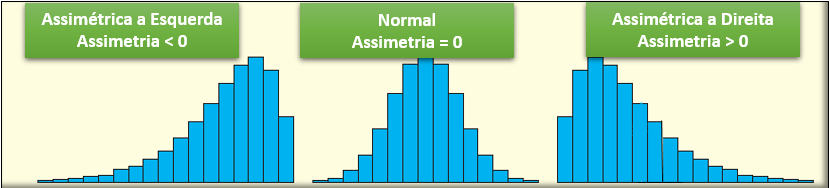

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.skew.html#pandas.DataFrame.skew">pandas.DataFrame.skew()</a> <br>
</p>

In [52]:
df[variaveis].skew().apply("{0:,.3f}".format)

LimiteTotal            2.627
RendaComprovada       69.838
Idade                  0.480
ValorCompra2010_01     2.621
Ocup_Lim_2010_01       1.212
LimXRenda             25.483
dtype: object


#### Curtose

<FONT SIZE="4">
$\begin{aligned}
Curtose = \frac{n(n + 1)} {(n - 1) (n - 2) (n - 3)}  \sum_{i=1}^{n} (\frac{x_i - \bar{x}} {S})^4 - \frac{3(n - 1)^2} {(n - 2)(n - 3)}
 \end{aligned}$
</FONT>



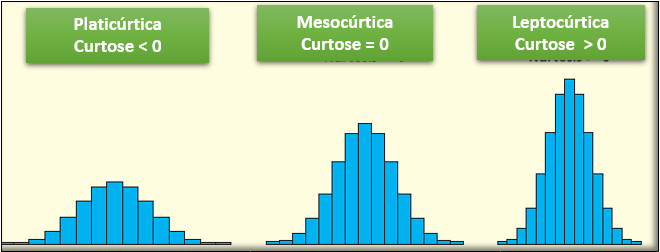

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.kurt.html#pandas.DataFrame.kurt">pandas.DataFrame.kurt()</a> <br>
</p>

In [53]:
df[variaveis].kurt().apply("{:,.3f}".format)

LimiteTotal               7.592
RendaComprovada       6,035.991
Idade                    -0.452
ValorCompra2010_01       12.860
Ocup_Lim_2010_01          8.459
LimXRenda             1,007.103
dtype: object

### Medidas de Posição Relativa

> - Escore Padronizado, ou Escore 𝒛: 
>> - É o número de desvios padrões a que se situa determinado valor x  abaixo ou acima da média.<br>

#### População

<FONT SIZE="4">
$\begin{aligned}
Z = \frac{x - \mu} {\sigma}
 \end{aligned}$
</FONT>

#### Amostra

<FONT SIZE="2">
$\begin{aligned}
Z = \frac{x - \bar{x}} {S}
 \end{aligned}$
</FONT>

#### Observações Não Usuais:

<FONT SIZE="2">
$\begin{aligned}
\text{Se } | Z_i | > 2 \text{, acima de } \mu \pm 2\sigma
 \end{aligned}$
</FONT>

#### Outliers:

<FONT SIZE="2">
$\begin{aligned}
\text{Se } | Z_i | > 3 \text{, acima de } \mu \pm 3\sigma
 \end{aligned}$
</FONT>


#### Estimando o Sigma:

<FONT SIZE="2">
$\begin{aligned}
\text{Para uma distribuição normal, a amplitude é aproximadamente } 6 \sigma \text{ de } (\mu - 3\sigma) \text{ até } (\mu - 3\sigma)
 \end{aligned}$
</FONT>

<FONT SIZE="2">
$\begin{aligned}
\text{Conhecendo-se a Amplitude (Máximo – Mínimo), estima-se o sigma por:  } \sigma = \frac{Amplitude} {6}
 \end{aligned}$
</FONT>



#### Padronizando - Escore Padrão Z

<p> Função Utilizada: <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">StandarScaler()</a> <br>
</p>


In [54]:
df1 = pd.DataFrame(StandardScaler().fit_transform(df[variaveis]), columns=variaveis)

In [55]:
df1.head(3)

,LimiteTotal,RendaComprovada,Idade,ValorCompra2010_01,Ocup_Lim_2010_01,LimXRenda
0,4.502926,0.201262,0.771048,0.925817,-1.208963,0.614100
1,0.613991,-0.134951,-1.177909,1.198864,-0.012739,2.028354
2,0.342038,-0.134951,2.202775,1.005500,0.166625,1.558852


#### Quartis e Outros Percentis
> - Percentis: Conjunto de dados dividido em 100 partes
> - Decil: Conjunto de dados dividido em 10 partes
> - Semi-decil: Conjunto de dados dividido em 20 partes
> - Quintil: Conjunto de dados dividido em 5 partes
> - Quartil: Conjunto de dados dividido em 4 partes aproximadamente iguais


<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html#pandas.DataFrame.quantile">pandas.DataFrame.quantile()</a> <br>
</p>

In [56]:
df[variaveis].quantile(.10).apply("{0:,.2f}".format)

LimiteTotal            90.00
RendaComprovada       320.00
Idade                  25.10
ValorCompra2010_01     35.01
Ocup_Lim_2010_01       13.78
LimXRenda              12.00
Name: 0.1, dtype: object

In [57]:
df['Ocup_Lim_2010_01'].quantile([.01, .02, .05, .10, .25, .50, .75, .90, .95, .98, .99]).apply("{0:,.0f}".format)

0.01      3
0.02      5
0.05      9
0.10     14
0.25     28
0.50     55
0.75     88
0.90    100
0.95    100
0.98    124
0.99    165
Name: Ocup_Lim_2010_01, dtype: object

### Gráfico de Caixa (Box Plot):

> - Baseado nos 5 números sumários: 𝑥_𝑚𝑖𝑛; 𝑄_1; 𝑄_2; 𝑄_3;𝑥_𝑚𝑎𝑥 <br>
> - Mostra a variabilidade e forma da distribuição
> - Valores fora da fronteira interna são não usuais e valores fora da fronteira externa são outliers




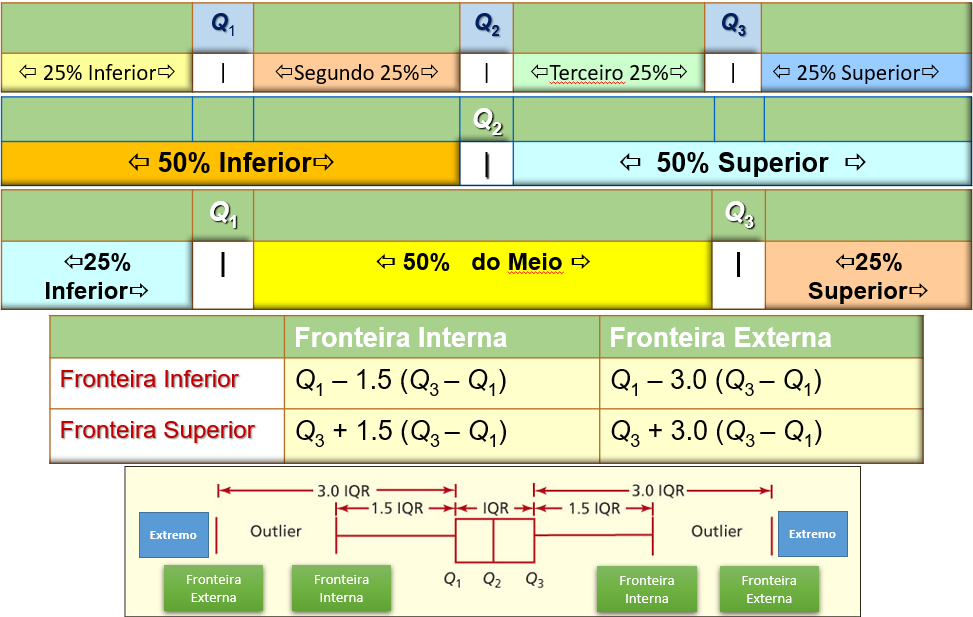

### Relação Entre Box Plot e Histograma
<br>

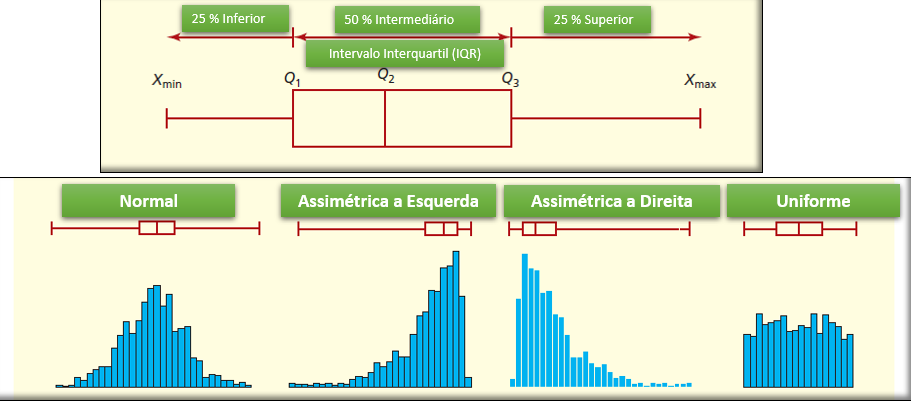

<AxesSubplot:>

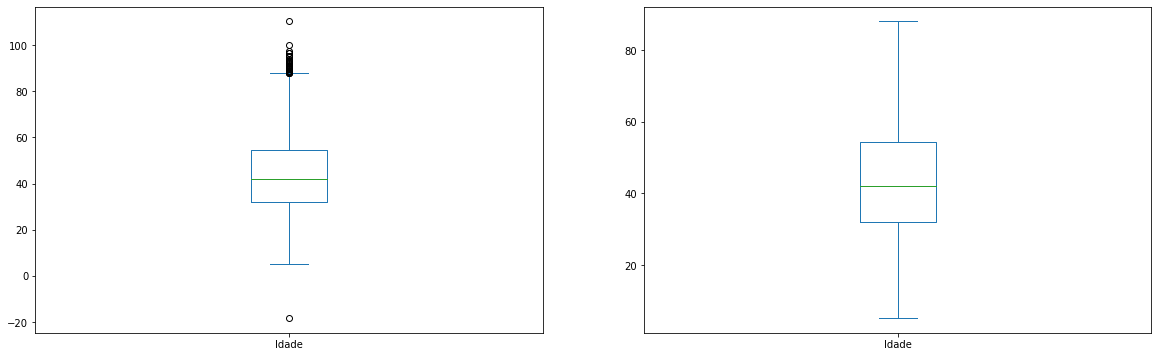

In [58]:
plt.rcParams["figure.figsize"] = (20,6)
fig, axes = plt.subplots(1, 2)
df["Idade"].plot(kind="box", ax=axes[0])
df["Idade"].plot(kind="box", showfliers=False, ax=axes[1])


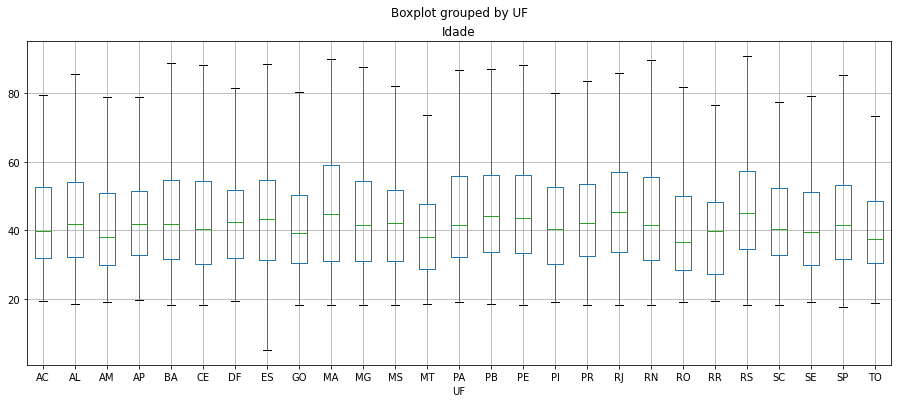

In [59]:
boxplot = df.boxplot(column="Idade", by='UF', layout=(1,1), figsize=[15,6], showfliers=False)

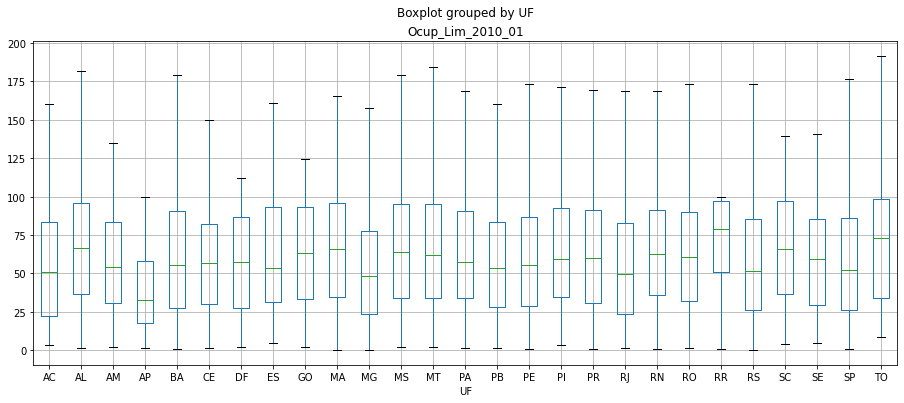

In [60]:
boxplot = df.boxplot(column="Ocup_Lim_2010_01", by='UF', layout=(1,1), figsize=[15,6], showfliers=False)

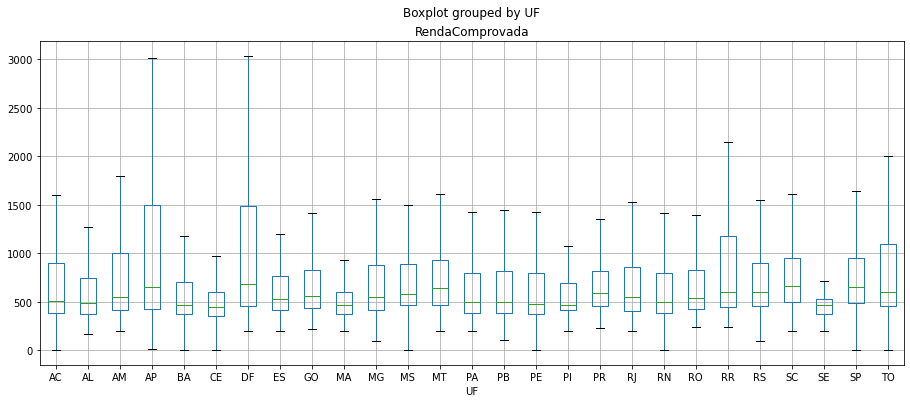

In [61]:
boxplot = df.boxplot(column="RendaComprovada", by='UF', layout=(1,1), figsize=[15,6], showfliers=False)

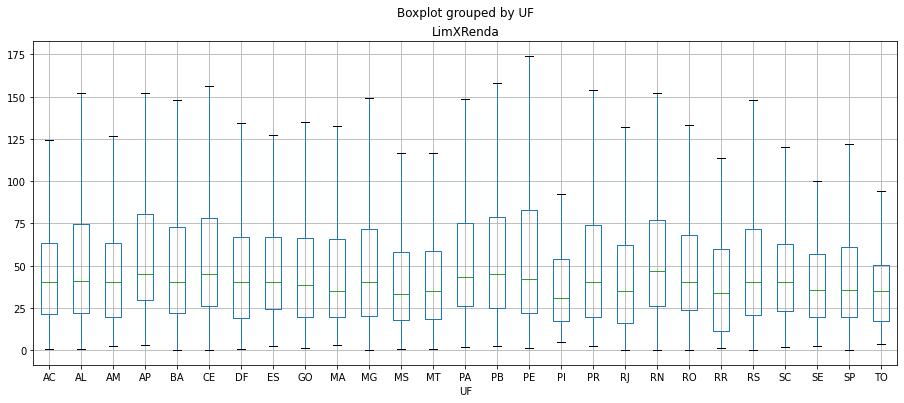

In [62]:
boxplot = df.boxplot(column="LimXRenda", by='UF', layout=(1,1), figsize=[15,6], showfliers=False)

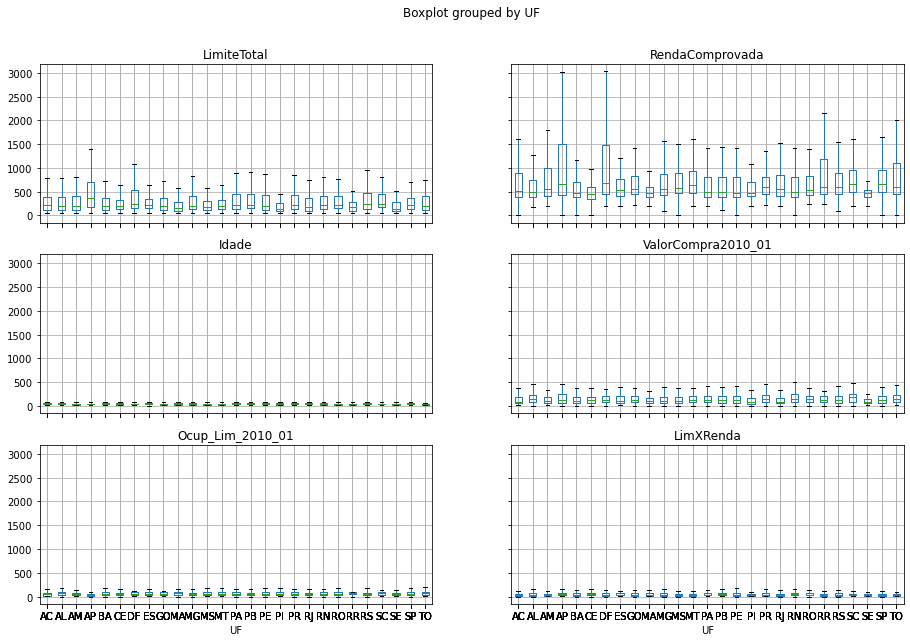

In [63]:
boxplot = df.boxplot(column=variaveis, by='UF', layout=(3,2), figsize=[15,10], showfliers=False)

Text(0.5, 1.0, 'Relação de Limite X Renda')

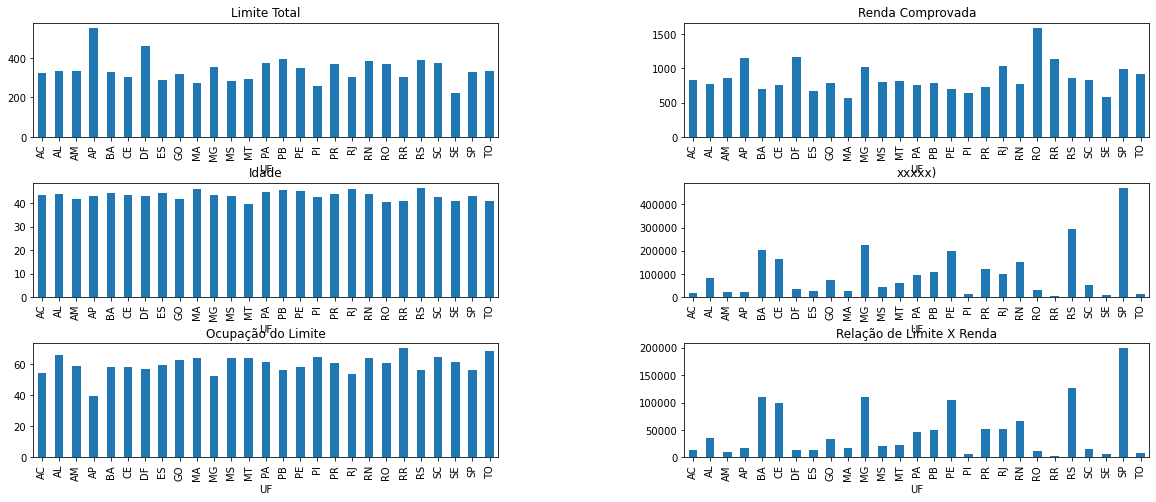

In [64]:
fig = plt.figure(figsize=[20,8])
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(3,2,1)
df_gr = df.groupby('UF').mean()['LimiteTotal']
df_gr.plot(kind='bar')
plt.title('Limite Total')

plt.subplot(3,2,2)
df_gr = df.groupby('UF').mean()['RendaComprovada']
df_gr.plot(kind='bar')
plt.title('Renda Comprovada')

plt.subplot(3,2,3)
df_gr = df.groupby('UF').mean()['Idade']
df_gr.plot(kind='bar')
plt.title('Idade')

plt.subplot(3,2,4)
df_gr = df.groupby('UF').sum()['ValorCompra2010_01']
df_gr.plot(kind='bar')
plt.title('xxxxx)')

plt.subplot(3,2,5)
df_gr = df.groupby('UF').mean()['Ocup_Lim_2010_01']
df_gr.plot(kind='bar')
plt.title('Ocupação do Limite')

plt.subplot(3,2,6)
df_gr = df.groupby('UF').sum()['LimXRenda']
df_gr.plot(kind='bar')
plt.title('Relação de Limite X Renda')

### Box Plot, Histograma e QQPlot

<p> Função Utilizada: <br>
<a href="https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html">statsmodels.graphics.gofplots.qqplot()</a> <br>
</p>

C:\Users\lopes\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


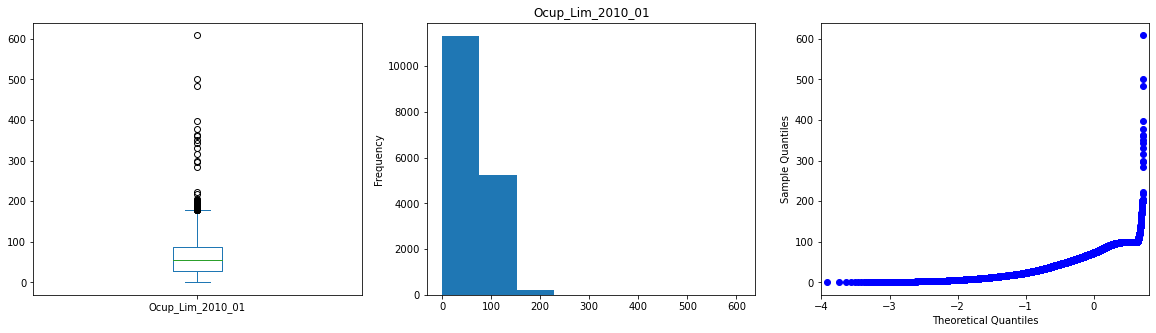

In [65]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["Ocup_Lim_2010_01"].plot(kind="box", ax=axes[0])
df["Ocup_Lim_2010_01"].plot(kind='hist', bins=8, ax=axes[1], title='Ocup_Lim_2010_01')
qqplot(df["Ocup_Lim_2010_01"], line='s', ax=axes[2])
plt.show()

## Covariância

Mede o grau em que os valores de duas variáveis 𝑋 e Y mudam juntas

#### Amostra:

<FONT SIZE="4">
$\begin{aligned}
S_{xy} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})} {n - 1}
 \end{aligned}$
</FONT>

#### População:

<FONT SIZE="4">
$\begin{aligned}
\sigma_{xy} = \frac{\sum_{i=1}^{n} (x_i - \mu_X)(y_i - \mu_Y)} {N}
 \end{aligned}$
</FONT>



<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html#pandas.DataFrame.cov">pandas.DataFrame.cov()</a> <br>
</p>

In [66]:
df[variaveis].cov().round(0)

,LimiteTotal,RendaComprovada,Idade,ValorCompra2010_01,Ocup_Lim_2010_01,LimXRenda
LimiteTotal,135217.0,81457.0,1133.0,28371.0,-5347.0,11525.0
RendaComprovada,81457.0,21145079.0,795.0,11781.0,-3695.0,-15039.0
Idade,1133.0,795.0,233.0,250.0,-62.0,129.0
ValorCompra2010_01,28371.0,11781.0,250.0,19687.0,1548.0,2823.0
Ocup_Lim_2010_01,-5347.0,-3695.0,-62.0,1548.0,1289.0,-585.0
LimXRenda,11525.0,-15039.0,129.0,2823.0,-585.0,7878.0


## Correlação

### Coeficiente de Correlação Linear de Pearson

Calcula a correlação linear entre pares de variáveis.

#### População:

<FONT SIZE="4">
$\begin{aligned}
\rho = \frac{\sigma_{XY}} {\sigma_X \sigma_Y}
 \end{aligned}$
</FONT>
<br>

#### Amostra:

<FONT SIZE="4">
$\begin{aligned}
r = \frac{S_{XY}} {S_X S_Y}
 \end{aligned}$
</FONT>
<br>

<FONT SIZE="4">
$\begin{aligned}
r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})} {\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \overline{y})^2}}
 \end{aligned}$
</FONT>

> O coeficiente de correlação de Pearson é uma estatística que descreve o grau de linearidade entre observações pareadas em variáveis quantitativas 𝑋 e 𝑌 <br>
> -1 <= r <= +1 <br>
> r = - 1: correlação linear negativa perfeita (reta decrescente).<br>
> r = +1: correlação linear positiva perfeita (reta crescente).<br>
> r = 0: não há correlação **LINEAR**.


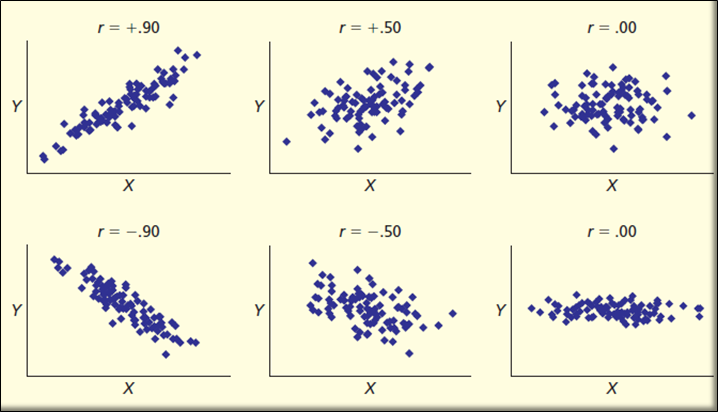

### Cálculo - Possibilidade 1

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html">corr()</a> <br>
</p>

Contudo, esta função não gera o p-valor (significânca estatísitca)

In [67]:
df[variaveis].corr().round(4)

,LimiteTotal,RendaComprovada,Idade,ValorCompra2010_01,Ocup_Lim_2010_01,LimXRenda
LimiteTotal,1.0000,0.0482,0.2020,0.5267,-0.3879,0.3531
RendaComprovada,0.0482,1.0000,0.0113,0.0187,-0.0229,-0.0368
Idade,0.2020,0.0113,1.0000,0.1161,-0.1130,0.0951
ValorCompra2010_01,0.5267,0.0187,0.1161,1.0000,0.3072,0.2411
Ocup_Lim_2010_01,-0.3879,-0.0229,-0.1130,0.3072,1.0000,-0.1952
LimXRenda,0.3531,-0.0368,0.0951,0.2411,-0.1952,1.0000


### Cálculo - Possibilidade 2

Calcula a correlação entre pares de variáveis. Contudo, a apresentação não é por matriz.

<p> Função Utilizada: <br>
<a href="https://researchpy.readthedocs.io/en/latest/corr_pair_documentation.html">corr_pair()</a> <br>
</p>


In [68]:
rs.correlation.corr_pair(df[variaveis])

,r value,p-value,N
LimiteTotal & RendaComprovada,0.0482,0.0000,21917
LimiteTotal & Idade,0.2020,0.0000,21916
LimiteTotal & ValorCompra2010_01,0.5267,0.0000,16780
LimiteTotal & Ocup_Lim_2010_01,-0.3879,0.0000,16780
LimiteTotal & LimXRenda,0.3531,0.0000,21917
RendaComprovada & Idade,0.0113,0.0934,21916
RendaComprovada & ValorCompra2010_01,0.0187,0.0155,16780
RendaComprovada & Ocup_Lim_2010_01,-0.0229,0.0030,16780
RendaComprovada & LimXRenda,-0.0368,0.0000,21917
Idade & ValorCompra2010_01,0.1161,0.0000,16779


### Cálculo - Possibilidade 3

Calcula a correlação entre pares de variáveis. Contudo, a apresentação não é por matriz.

<p> Função Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html">pearsonr()</a> <br>
</p>


In [69]:
df1 = df[~(df['LimiteTotal'].isna()) & ~(df['Idade'].isna())]

In [70]:
r, pvalor = st.pearsonr(df1["Idade"], df1["LimiteTotal"])

In [71]:
print ('Correlação (r): ', r.round(4), " p-valor: ", pvalor.round(4))

Correlação (r):  0.202  p-valor:  0.0


### Diagrama de Dispersão - Scartter

Correlaciona duas variáveis métricas.

<p> Função Utilizada: <br>
<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html">matplotlib.pyplot.scatter()</a> <br>
</p>


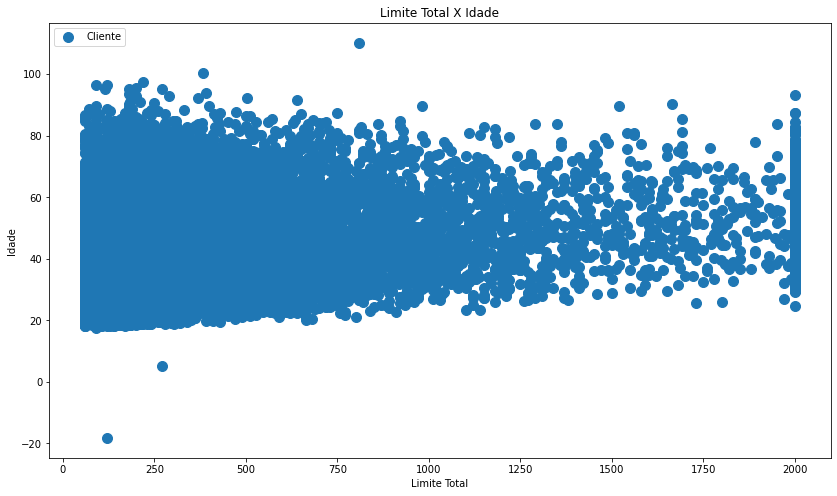

In [72]:
plt.figure(figsize=(14, 8))
plt.scatter(df["LimiteTotal"].tolist(), df["Idade"].tolist(), s=100,cmap='Set3', label="Cliente")
plt.title("Limite Total X Idade")
plt.xlabel("Limite Total")
plt.ylabel("Idade")
plt.legend(loc='upper left')
plt.show()

plt.show()

## Outras Análises

### Cálculo de Variáveis


In [73]:
df['RendaPercapta'] = ((df['RendaComprovada']) / (df['NumeroDependentes'] + 1) ).round(2)

In [101]:
#df.drop(['NDP1'], axis='columns', inplace=True)

In [74]:
df.head(5)

,Cod_Cliente,Cod_Estabelecimento,DataCadastramento,CEP,UF,Sexo,EstadoCivil,DataNascimento,NaturezaOcupacao,GrauInstrucao,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento,Idade,Ocup_Lim_2010_01,LimXRenda,RendaPercapta
0,276233,1093,2004-05-01,54800000,PE,F,Viúvo,1954-06-26,Aposentado,Até 1 Grau Completo,0.0,2000.0,1786.0,1.119821,10,2164.18,12.0,15.0,3462.69,1.0,288.82,4.0,55.76,14.44,111.98,1786.0
1,276470,591,2004-05-01,56318260,PE,M,Solteiro,1984-03-21,Empregados,Até 1 Grau Completo,3.0,570.0,240.0,2.375000,10,2669.77,11.0,16.0,2868.60,1.0,327.13,NaN,26.03,57.39,237.50,60.0
2,276604,906,2004-09-01,59069350,RN,F,Solteiro,1932-08-25,Aposentado,Até 1 Grau Completo,0.0,470.0,240.0,1.958333,78,1860.31,12.0,133.0,2818.25,15.0,300.00,2.0,77.60,63.83,195.83,240.0
3,276804,904,2004-05-01,51350540,PE,F,Solteiro,1966-10-03,Aposentado,Até 2 Grau Completo,0.0,242.0,689.0,0.351234,4,286.70,2.0,3.0,259.77,1.0,26.93,4.0,43.49,11.13,35.12,689.0
4,277105,1475,2004-05-01,06132220,SP,M,Casado,1975-11-29,Empregados,Até 2 Grau Completo,1.0,2000.0,1000.0,2.000000,8,1276.42,9.0,12.0,2016.44,1.0,255.78,4.0,34.34,12.79,200.00,500.0


In [75]:
df['RendaPercapta'].describe().round(2)

count     17046.00
mean        642.24
std        3933.40
min           1.16
25%         253.27
50%         447.16
75%         682.88
max      465000.00
Name: RendaPercapta, dtype: float64


### Agregação

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">pandas.DataFrame.groupby()</a> <br>
</p>


In [76]:
df.groupby(['UF']).agg({'Cod_Cliente': ['count'], 'Idade': ['mean'], 'RendaPercapta': ['mean']}).round(2)

,Cod_Cliente,Idade,RendaPercapta
,count,mean,mean
UF,,,
AC,194,43.31,596.07
AL,611,43.95,599.00
AM,202,41.89,587.75
AP,195,43.02,706.72
BA,1784,44.30,578.30
CE,1535,43.38,467.39
DF,259,43.14,731.24
ES,230,44.14,562.12


In [77]:
df.groupby(['UF', 'Sexo']).agg({'Cod_Cliente': ['count'], 'Idade': ['mean'], 'RendaPercapta': ['sum']}).round(2)

Cod_Cliente  Idade RendaPercapta
              count   mean           sum
UF Sexo                                 
AC F            131  42.79      70292.58
   M             63  44.41      23290.01
AL F            361  45.44     175327.91
   M            247  41.85     115206.34
AM F            120  43.50      53846.37
   M             82  39.54      46070.51
AP F            122  42.21      68565.89
   M             72  44.40      45429.45
BA F           1020  45.04     379154.02
   M            762  43.30     418469.00
CE F            968  44.23     316849.79
   M            564  41.93     226967.83
DF F            162  44.54      92200.34
   M             97  40.81      63552.96
ES F            139  43.71      52621.40
   M             91  44.79      47998.85
GO F            334  42.15     149922.52
   M            272  41.32     117265.27
MA F            191  45.28      49382.62
   M             95  47.65      33320.25
MG F           1137  43.86     950300.48
   M            781  43.13     461878.62
MS F            215  43.74      91661.90
   M            154  41.99      81627.48
MT F            224  39.99     114711.96
   M            267  39.62     138841.21
PA F            410  47.04     171843.93
   M            345  42.23     174232.75
PB F            494  45.99     208441.23
   M            294  45.14     158012.00
PE F           1014  45.63     383525.18
   M            632  44.71     309389.36
PI F             90  43.50      26154.43
   M             40  40.38      10225.04
PR F            473  44.39     188152.35
   M            378  43.20     170148.83
RJ F            683  46.10     305275.71
   M            375  45.56     342728.89
RN F            585  45.46     252248.65
   M            388  41.81     237338.69
RO F            115  42.17      49642.83
   M            109  38.40      43185.80
RR F             29  39.98      13522.43
   M             32  41.65      31905.84
RS F           1271  46.72     640636.81
   M            937  45.69     532349.18
SC F            160  42.28      76805.87
   M            148  43.01      75107.42
SE F             92  42.13      32369.42
   M             49  38.70      16200.32
SP F           2354  43.46    1094645.06
   M           1633  42.76     966478.82
TO F             49  43.52      24389.77
   M             51  38.08      21100.90


### Subgrupos

<p> Função Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html">pandas.DataFrame.loc()</a> <br>
</p>


<AxesSubplot:>

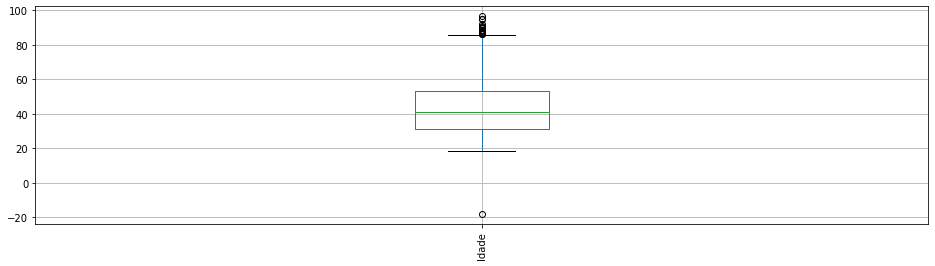

In [78]:
df_0 = df.loc[df['Sexo'] == 'M']
df_0.loc[:,'Idade':'Idade'].boxplot(showfliers=True, figsize=[16,4], rot=90)

#### Extração do Mês da Date de Cadastramento

<p> Resample. Utilizada para extrair contagens a partir de datas
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html">resample()</a> <br>
</p>


<AxesSubplot:xlabel='DataCadastramento'>

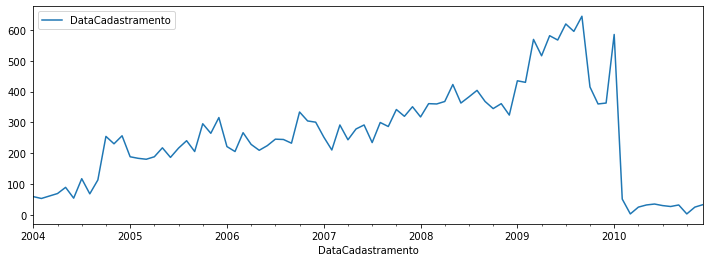

In [79]:
df[['DataCadastramento']].resample(rule='M', on='DataCadastramento').count().plot(figsize=(12, 4))

#### Cruzando Arquivos


In [81]:
df_v = pd.read_excel("../../DADOS/Compras.xlsx", sheet_name = "Compras", parse_dates=["Data_Compra"])

<p>Ordenação (sort) de arquivos: 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html">sort_values</a>
</p>

In [82]:
df_v = df_v.sort_values(by=['Cod_Cliente', 'Data_Compra'])

In [83]:
df_v.head(10)

,Cod_Cliente,Cod_Compra,Data_Compra,Valor_Compra,QtdParcela
0,276233,493806305,2010-02-06,449.59,2
1,276470,494528516,2010-02-09,27.38,1
2,276470,498957035,2010-02-25,349.60,1
3,276604,492559567,2010-01-30,6.32,1
4,276604,492557513,2010-01-31,10.00,1
5,276604,495133320,2010-02-10,46.00,1
6,276604,495680295,2010-02-11,17.65,1
7,276604,496660240,2010-02-13,20.45,1
8,276604,497534467,2010-02-19,32.46,1
9,276604,500475369,2010-02-26,32.60,1


In [84]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48689 entries, 0 to 48688
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Cod_Cliente   48689 non-null  int64         
 1   Cod_Compra    48689 non-null  int64         
 2   Data_Compra   48689 non-null  datetime64[ns]
 3   Valor_Compra  48689 non-null  float64       
 4   QtdParcela    48689 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.2 MB


Criação de uma nova coluna: **Dif_Dias**<br>
Com o arquivo ordenado por Cod_Cliente e Data_Compra, calula-se a diferença entre dias que o cliente efetuou compras. Para a primeira compra do cliente, o valor será nulo, pois ainda não fez uma compra previamente.

<p>Desloca/faz referência para registros anteriores: 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html">shift()</a>
</p>

In [85]:
df_v['Dif_Dias'] = np.where(df_v['Cod_Cliente'] == df_v['Cod_Cliente'].shift(1), 
                            (df_v['Data_Compra'] - df_v['Data_Compra'].shift(1)).dt.days, np.nan)

In [86]:
df_v.head(10)

,Cod_Cliente,Cod_Compra,Data_Compra,Valor_Compra,QtdParcela,Dif_Dias
0,276233,493806305,2010-02-06,449.59,2,NaN
1,276470,494528516,2010-02-09,27.38,1,NaN
2,276470,498957035,2010-02-25,349.60,1,16.0
3,276604,492559567,2010-01-30,6.32,1,NaN
4,276604,492557513,2010-01-31,10.00,1,1.0
5,276604,495133320,2010-02-10,46.00,1,10.0
6,276604,495680295,2010-02-11,17.65,1,1.0
7,276604,496660240,2010-02-13,20.45,1,2.0
8,276604,497534467,2010-02-19,32.46,1,6.0
9,276604,500475369,2010-02-26,32.60,1,7.0


<p>Agrega o arquivo por <b>Cod_Cliente</b>. Gera uma única linha por cliente com a quantidade de compras realizadas, o valor médio das compras e o intervalo de dias entre as compras:
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html">shift()</a>
</p>

In [87]:
df_v_group = df_v.groupby('Cod_Cliente').agg({'Cod_Compra': ['count'], 'Valor_Compra': ['sum'], 'Dif_Dias': ['mean']})

In [88]:
# renomeia as colunas do Data Frame gerado (df_v_grupo)

df_v_group.columns = ['Qtd_Compra_2010_02', 'Valor_Compra_2010_02', 'Dif_Dias_Medio_Compras_2010_02']

In [89]:
# reindexa para obter as colunas agrupadas
df_v_group = df_v_group.reindex()

In [90]:
df_v_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21917 entries, 276233 to 4086816
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Qtd_Compra_2010_02              21917 non-null  int64  
 1   Valor_Compra_2010_02            21917 non-null  float64
 2   Dif_Dias_Medio_Compras_2010_02  10280 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 684.9 KB


In [91]:
df_v_group.head(3).round(2)

,Qtd_Compra_2010_02,Valor_Compra_2010_02,Dif_Dias_Medio_Compras_2010_02
Cod_Cliente,,,
276233,1,449.59,NaN
276470,2,376.98,16.0
276604,7,165.48,4.5


<p><b>Clientes</b>. Cria o  índice na tabela Clientes por <b>Cod_Cliente</b>. Necessário para fazer <b>Join</b> com a tabela de compras.:
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html">set_index()</a>
</p>

In [92]:
df = df.set_index('Cod_Cliente')

In [93]:
df.head(3)

,Cod_Estabelecimento,DataCadastramento,CEP,UF,Sexo,EstadoCivil,DataNascimento,NaturezaOcupacao,GrauInstrucao,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento,Idade,Ocup_Lim_2010_01,LimXRenda,RendaPercapta
Cod_Cliente,,,,,,,,,,,,,,,,,,,,,,,,,
276233,1093,2004-05-01,54800000,PE,F,Viúvo,1954-06-26,Aposentado,Até 1 Grau Completo,0.0,2000.0,1786.0,1.119821,10,2164.18,12.0,15.0,3462.69,1.0,288.82,4.0,55.76,14.44,111.98,1786.0
276470,591,2004-05-01,56318260,PE,M,Solteiro,1984-03-21,Empregados,Até 1 Grau Completo,3.0,570.0,240.0,2.375000,10,2669.77,11.0,16.0,2868.60,1.0,327.13,NaN,26.03,57.39,237.50,60.0
276604,906,2004-09-01,59069350,RN,F,Solteiro,1932-08-25,Aposentado,Até 1 Grau Completo,0.0,470.0,240.0,1.958333,78,1860.31,12.0,133.0,2818.25,15.0,300.00,2.0,77.60,63.83,195.83,240.0


<p> Concatena a tabela <b>Clientes</b> e a tabela <b>Compras</b> e armazena o resultado na tabela <b>Clientes</b>:
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html">concat()</a>
</p>

In [94]:
df = pd.concat([df, df_v_group], axis=1).reindex(df.index).round(2)

In [95]:
df = df.reset_index()

A coluna <b>Cod_Cliente</b> deixa de ser índice e passa a ser uma coluna normal.

In [96]:
df.head(3)

,Cod_Cliente,Cod_Estabelecimento,DataCadastramento,CEP,UF,Sexo,EstadoCivil,DataNascimento,NaturezaOcupacao,GrauInstrucao,NumeroDependentes,LimiteTotal,RendaComprovada,LimiteXReda,QtdCompras2008,ValorCompras2008,Qtd_Meses_Compra2009,QtdeCompra2009,ValorCompra2009,QtdeCompra2010_01,ValorCompra2010_01,Porte_Estabelecimento,Idade,Ocup_Lim_2010_01,LimXRenda,RendaPercapta,Qtd_Compra_2010_02,Valor_Compra_2010_02,Dif_Dias_Medio_Compras_2010_02
0,276233,1093,2004-05-01,54800000,PE,F,Viúvo,1954-06-26,Aposentado,Até 1 Grau Completo,0.0,2000.0,1786.0,1.12,10,2164.18,12.0,15.0,3462.69,1.0,288.82,4.0,55.76,14.44,111.98,1786.0,1,449.59,NaN
1,276470,591,2004-05-01,56318260,PE,M,Solteiro,1984-03-21,Empregados,Até 1 Grau Completo,3.0,570.0,240.0,2.38,10,2669.77,11.0,16.0,2868.60,1.0,327.13,NaN,26.03,57.39,237.50,60.0,2,376.98,16.0
2,276604,906,2004-09-01,59069350,RN,F,Solteiro,1932-08-25,Aposentado,Até 1 Grau Completo,0.0,470.0,240.0,1.96,78,1860.31,12.0,133.0,2818.25,15.0,300.00,2.0,77.60,63.83,195.83,240.0,7,165.48,4.5


<p> Salva o arquivo em formato <b>csv</b>:
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html">to_csv()</a>
</p>

In [97]:
df.to_csv('../../DADOS/Clientes_Catao.csv', encoding='utf-8', decimal=',')